In [1]:
FNAME = 'wannabe_final'

# 00 Init

## Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [5]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [6]:
! pip install codes

## Import py files

In [7]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.newVectorDQN import *
from codes.net.basicWithBias import *
from codes.trainer.validShutDown import *
# from codes.tester.basic import *
from codes.tester.validShutDown import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## Import Libraries

# 01 Info

## level dictionary

In [8]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [9]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.001
LEARN_DECAY = 0.25
LEARN_EPOCH = 50000
# LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 128
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [10]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':0.1, 'no_progress' : -1},
                    dones={'win':True, 'lose':True, 'progress':False, 'guess':False, 'no_progress' : False})

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

agent = Agent(env=env,
              net=net,
              MEM_SIZE=MEM_SIZE,
              MEM_SIZE_MIN=MEM_SIZE_MIN,
              BATCH_SIZE=BATCH_SIZE,
              LEARNING_RATE=LEARNING_RATE,
              LEARN_DECAY=LEARN_DECAY,
              LEARN_EPOCH=LEARN_EPOCH,
              # LEARN_MIN=LEARN_MIN,
              DISCOUNT=DISCOUNT,
              EPSILON=EPSILON,
              EPSILON_DECAY=EPSILON_DECAY,
              EPSILON_MIN=EPSILON_MIN,
              UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## TRAIN_PARAMETERS

In [11]:
EPISODES = 100000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_TIMESTEPS = ['every timestep', 'every episodes']
TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0]
VIUSAL_INTERVAL = 100

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

## valid agent in train

In [12]:
tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## main

In [13]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=False,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [16]:
with open(os.path.join(trainer.total_path, f'{2*EPISODES}'), "rb") as f:
    trainer = pickle.load(f)

In [ ]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [18]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}'), "wb") as f:
    pickle.dump(trainer, f)

Episode: [100000/100]| Median progress: 19.00 | Median reward: 5.90 | Win rate : 0.820 | Epsilon: 0.01
Episode: [100000/200]| Median progress: 16.00 | Median reward: 5.10 | Win rate : 0.760 | Epsilon: 0.01
Episode: [100000/300]| Median progress: 18.00 | Median reward: 5.90 | Win rate : 0.840 | Epsilon: 0.01
Episode: [100000/400]| Median progress: 17.00 | Median reward: 5.30 | Win rate : 0.870 | Epsilon: 0.01
Episode: [100000/500]| Median progress: 16.00 | Median reward: 4.95 | Win rate : 0.760 | Epsilon: 0.01
Episode: [100000/600]| Median progress: 18.50 | Median reward: 5.90 | Win rate : 0.790 | Epsilon: 0.01
Episode: [100000/700]| Median progress: 16.50 | Median reward: 5.20 | Win rate : 0.810 | Epsilon: 0.01
Episode: [100000/800]| Median progress: 16.50 | Median reward: 5.00 | Win rate : 0.790 | Epsilon: 0.01
Episode: [100000/900]| Median progress: 17.50 | Median reward: 5.40 | Win rate : 0.780 | Epsilon: 0.01
Episode: [100000/1000]| Median progress: 17.00 | Median reward: 5.55 | Wi

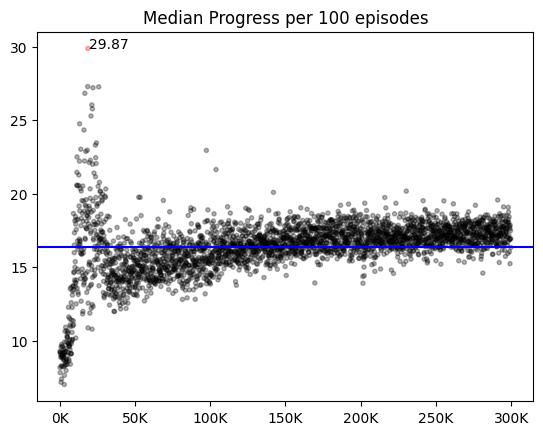

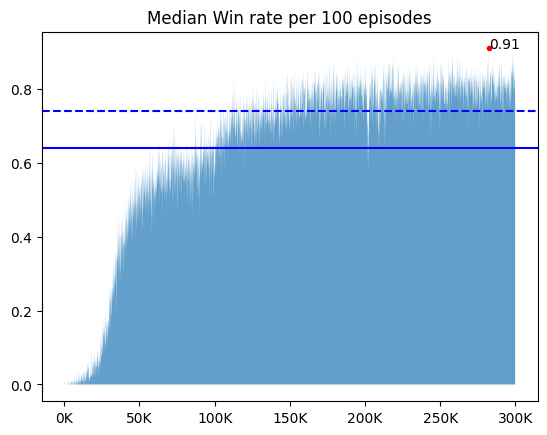

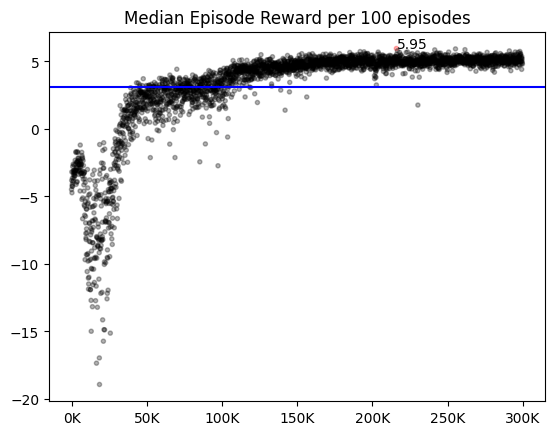

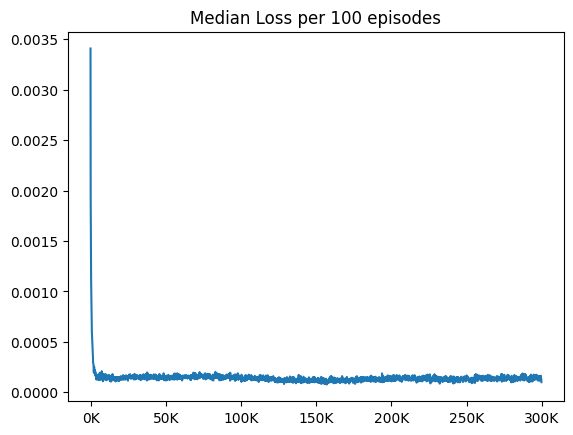

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final'는 이미 존재합니다.
모델이 저장되었습니다.


In [17]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

Episode: [100000/100]| Median progress: 18.00 | Median reward: 5.60 | Win rate : 0.800 | Epsilon: 0.01
Episode: [100000/200]| Median progress: 18.00 | Median reward: 5.45 | Win rate : 0.810 | Epsilon: 0.01
Episode: [100000/300]| Median progress: 17.50 | Median reward: 5.45 | Win rate : 0.840 | Epsilon: 0.01
Episode: [100000/400]| Median progress: 18.00 | Median reward: 5.30 | Win rate : 0.770 | Epsilon: 0.01
Episode: [100000/500]| Median progress: 18.00 | Median reward: 5.40 | Win rate : 0.840 | Epsilon: 0.01
Episode: [100000/600]| Median progress: 19.00 | Median reward: 5.90 | Win rate : 0.850 | Epsilon: 0.01
Episode: [100000/700]| Median progress: 18.00 | Median reward: 5.55 | Win rate : 0.810 | Epsilon: 0.01
Episode: [100000/800]| Median progress: 17.00 | Median reward: 5.00 | Win rate : 0.750 | Epsilon: 0.01
Episode: [100000/900]| Median progress: 18.00 | Median reward: 5.40 | Win rate : 0.770 | Epsilon: 0.01
Episode: [100000/1000]| Median progress: 19.00 | Median reward: 5.60 | Wi

# 03 Tester

## def tester env, agent

In [ ]:
tester_env = LimitedMinesweeperEnv(map_size=level['easy']['map_size'],
                                    n_mines=level['easy']['n_mines'],
                                    train=False)

tester_agent = Agent(env=tester_env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## def tester

### fixed

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_valid'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_train'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['final_model'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_successed'])

### random

In [18]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.805


In [19]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.60, Win rate : 0.813


In [20]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.831


In [21]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.83


### random

In [19]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.60, Win rate : 0.8


In [20]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.60, Win rate : 0.816


In [21]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.84


In [22]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.819


## 진 케이스 시각화

In [23]:
target_done = tester.lost_game_done
idx_iteration = iter(range(len(target_done)))

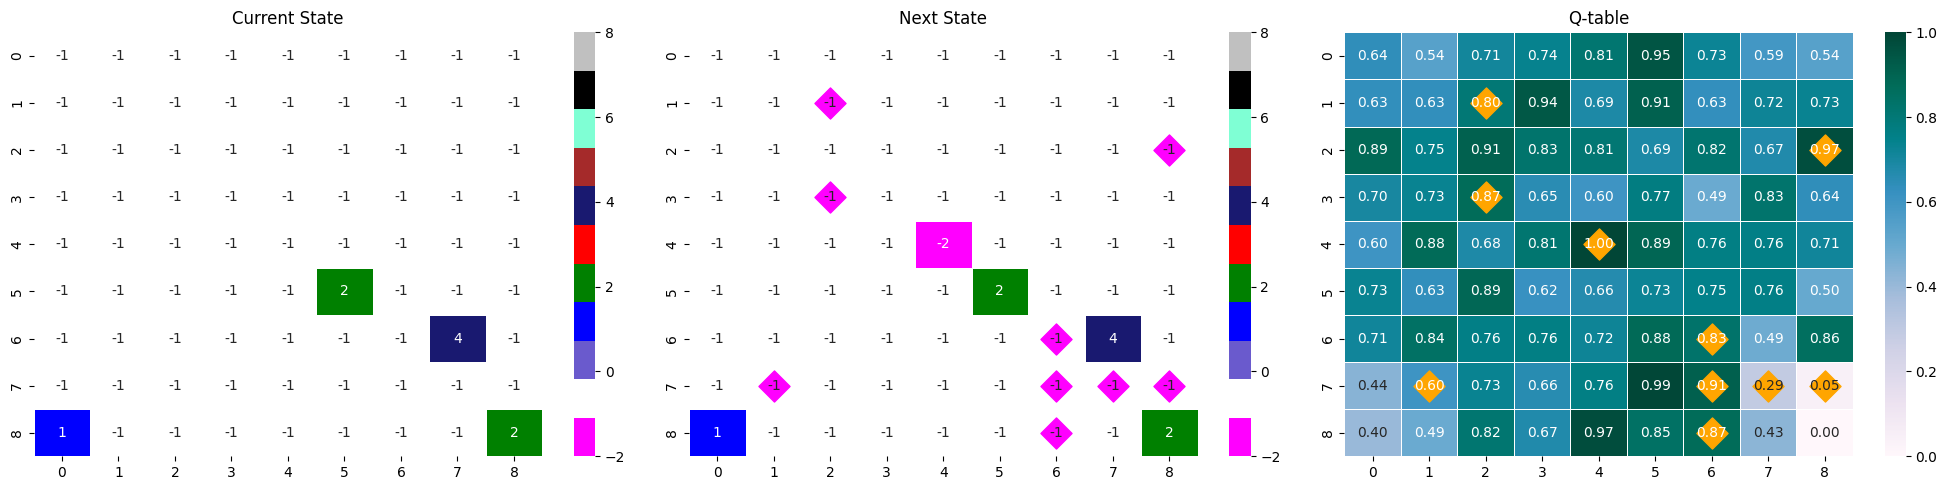

In [24]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx])

In [25]:
target_iter = tester.lost_game_per_epi

In [26]:
epi, epi_df = next(target_iter)

tester.replay_single_episode(epi_df)

coord (8, 0) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.
8,1,.,.,.,.,.,.,.,.


 
coord (8, 8) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.
8,1,.,.,.,.,.,.,.,2


 
coord (6, 7) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,4,.
7,.,.,.,.,.,.,.,.,.
8,1,.,.,.,.,.,.,.,2


 
coord (5, 5) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,2,.,.,.
6,.,.,.,.,.,.,.,4,.
7,.,.,.,.,.,.,.,.,.
8,1,.,.,.,.,.,.,.,2


 
coord (4, 4) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,M,.,.,.,.
5,.,.,.,.,.,2,.,.,.
6,.,.,.,.,.,.,.,4,.
7,.,.,.,.,.,.,.,.,.
8,1,.,.,.,.,.,.,.,2


In [27]:
tester.lost_more18_percent

0.592

## 승리한 케이스 시각화

In [26]:
target_done = tester.won_game_done
idx_iteration = iter(range(len(target_done)))

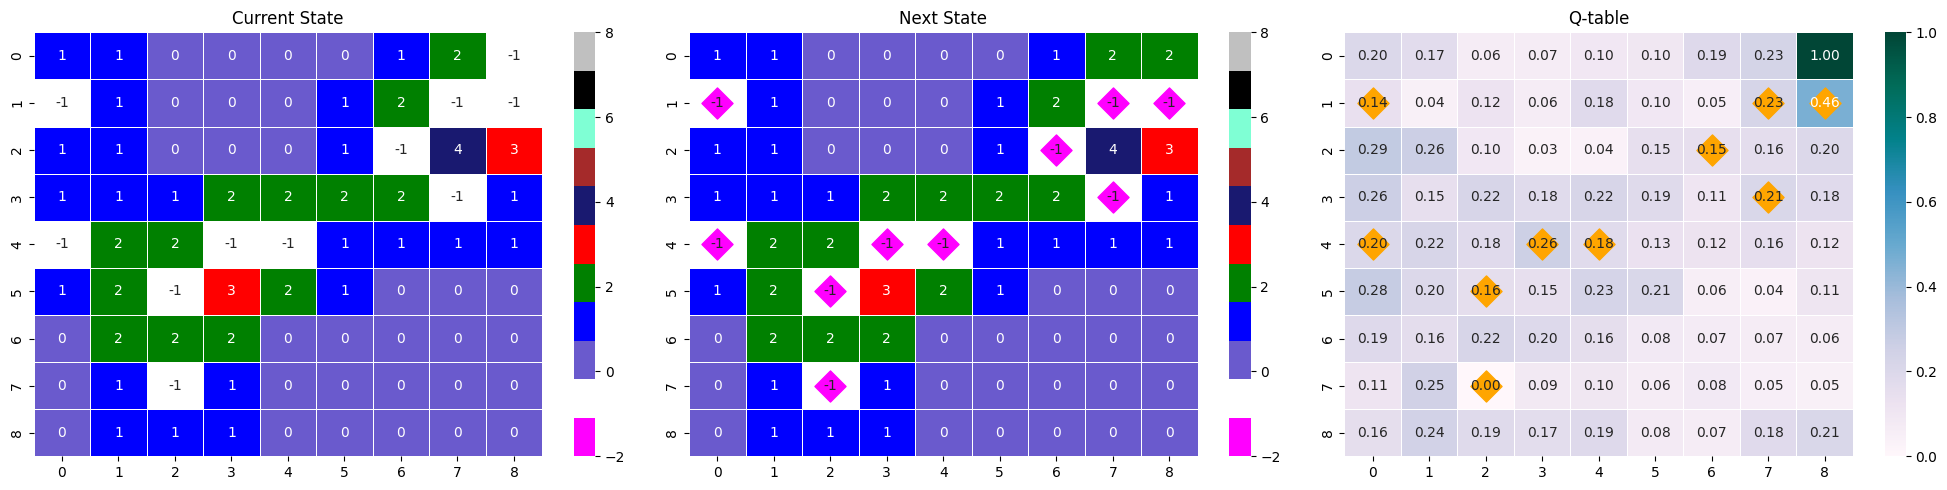

In [27]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx])

In [28]:
target_iter = tester.won_game_per_epi

In [29]:
epi, epi_df = next(target_iter)
tester.replay_single_episode(epi_df)

coord (8, 0) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,.,.,.,.,.,.,.
7,0,1,.,.,.,.,.,.,.
8,0,1,.,.,.,.,.,.,.


 
coord (4, 2) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,.,.,.,.,.,.,.
7,0,1,.,.,.,.,.,.,.
8,0,1,.,.,.,.,.,.,.


 
coord (8, 2) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,.,.,.,.,.,.,.
7,0,1,.,.,.,.,.,.,.
8,0,1,1,.,.,.,.,.,.


 
coord (6, 2) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,2,.,.,.,.,.,.
7,0,1,.,.,.,.,.,.,.
8,0,1,1,.,.,.,.,.,.


 
coord (7, 3) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,2,.,.,.,.,.,.
7,0,1,.,1,.,.,.,.,.
8,0,1,1,.,.,.,.,.,.


 
coord (8, 3) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,.,.,.,.
5,1,2,.,.,.,.,.,.,.
6,0,2,2,.,.,.,.,.,.
7,0,1,.,1,.,.,.,.,.
8,0,1,1,1,.,.,.,.,.


 
coord (8, 4) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 6) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 4) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,.,2,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 3) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,.,2,2,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 2) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.
3,.,.,1,2,2,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (2, 1) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,1,.,.,.,.,.,.,.
3,.,.,1,2,2,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 1) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.
2,.,1,.,.,.,.,.,.,.
3,.,1,1,2,2,.,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (2, 2) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,.,1,0,0,0,1,.,.,.
3,.,1,1,2,2,2,2,.,.
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 8) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,.,1,0,0,0,1,.,.,.
3,.,1,1,2,2,2,2,.,1
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (2, 8) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,.,1,0,0,0,1,.,.,3
3,.,1,1,2,2,2,2,.,1
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (2, 0) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,.,3
3,.,1,1,2,2,2,2,.,1
4,.,.,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (4, 1) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,.,3
3,.,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (2, 7) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,4,3
3,.,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (3, 0) is clicked.


,0,1,2,3,4,5,6,7,8
0,.,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,4,3
3,1,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (0, 0) is clicked.


,0,1,2,3,4,5,6,7,8
0,1,1,0,0,0,0,1,.,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,4,3
3,1,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (0, 7) is clicked.


,0,1,2,3,4,5,6,7,8
0,1,1,0,0,0,0,1,2,.
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,4,3
3,1,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


 
coord (0, 8) is clicked.


,0,1,2,3,4,5,6,7,8
0,1,1,0,0,0,0,1,2,2
1,.,1,0,0,0,1,2,.,.
2,1,1,0,0,0,1,.,4,3
3,1,1,1,2,2,2,2,.,1
4,.,2,2,.,.,1,1,1,1
5,1,2,.,3,2,1,0,0,0
6,0,2,2,2,0,0,0,0,0
7,0,1,.,1,0,0,0,0,0
8,0,1,1,1,0,0,0,0,0


# etc

In [ ]:

# Learning settings
BATCH_SIZE = 4

# env = MinesweeperEnv(map_size=(4,4),
#                      n_mines=2)

env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'])

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

agent = Agent(env=env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

# agent = Limited18Agent(env=env,
#                         net=net,
#                         MEM_SIZE=MEM_SIZE,
#                         MEM_SIZE_MIN=MEM_SIZE_MIN,
#                         BATCH_SIZE=BATCH_SIZE,
#                         LEARNING_RATE=LEARNING_RATE,
#                         LEARN_DECAY=LEARN_DECAY,
#                         LEARN_MIN=LEARN_MIN,
#                         DISCOUNT=DISCOUNT,
#                         EPSILON=EPSILON,
#                         EPSILON_DECAY=EPSILON_DECAY,
#                         EPSILON_MIN=EPSILON_MIN,
#                         UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    LEARN_MIN=LEARN_MIN,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name='episodeInterval',
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0],
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [ ]:
class Agent:
    def __init__(self, env, net, **kwargs):
        self.env = env

        # Environment Settings
        self.mem_size = kwargs.get("MEM_SIZE")
        self.mem_size_min = kwargs.get("MEM_SIZE_MIN")

        # Learning Settings
        self.batch_size = kwargs.get("BATCH_SIZE")
        self.learning_rate = kwargs.get("LEARNING_RATE")
        self.learn_decay = kwargs.get("LEARN_DECAY")
        self.learn_min = kwargs.get("LEARN_MIN")
        self.discount = kwargs.get("DISCOUNT")

        # Exploration Settings
        self.epsilon = kwargs.get("EPSILON")
        self.epsilon_decay = kwargs.get("EPSILON_DECAY")
        self.epsilon_min = kwargs.get("EPSILON_MIN")

        # loss
        self.loss_fn = nn.MSELoss()
        self.losses = []

        # target net update
        self.target_update_counter = 0
        self.update_target_baseline = kwargs.get("UPDATE_TARGET_EVERY")

        # def model
        self.model = copy.deepcopy(net)
        self.target_model = copy.deepcopy(net)

        self.target_model.load_state_dict(self.model.state_dict())

        self.model.to(device)
        self.target_model.to(device)

        # replay memory
        self.replay_memory = deque(maxlen=self.mem_size)

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def update_replay_memory(self, transition):
        self.replay_memory.append(transition)

    def get_action(self, state):
        '''
        get_action은 하나의 state_img만을 받는다.
        '''
        if np.random.random() < self.epsilon:
            # take random action
            action = np.random.choice(range(self.env.total_tiles))

        else:
            self.model.eval()

            with torch.no_grad():
                state = torch.tensor(state.reshape(1,1,self.env.nrows,self.env.ncols),
                                     dtype=torch.float32).to(device)
                total_action = self.model(state).view(-1)
                total_action = total_action.cpu()

                self.total_action = total_action

                action = torch.argmax(total_action).item()

        return action

    def train(self, done):
        if len(self.replay_memory) < self.mem_size_min:
            return

        # optimizer
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate, eps=1e-4)

        # 리플레이 메모리에서 배치 사이즈만큼 데이터를 꺼낸다.
        # batch[i] = (current_state, action, reward, new_current_state, done)
        batch = random.sample(self.replay_memory, self.batch_size)

        # 배치 안에 저장되어 있는 정보 꺼내기
        current_states, actions, rewards, next_states, epi_dones = zip(*batch)

        current_states =  torch.tensor(np.array(current_states), dtype=torch.float32).reshape(-1,1,self.env.nrows,self.env.ncols).to(device)
        next_states = torch.tensor(np.array(next_states), dtype=torch.float32).reshape(-1,1,self.env.nrows,self.env.ncols).to(device)

        actions = torch.tensor(np.array(actions), dtype=torch.int).to(device)
        rewards = torch.tensor(np.array(rewards), dtype=torch.float).reshape(-1,1).to(device)
        epi_dones = torch.tensor(np.array(epi_dones), dtype=torch.float).reshape(-1,1).to(device)

        self.model.train()
        self.target_model.eval()

        current_q_values = self.model(current_states)

        with torch.no_grad():
            next_q_values = self.target_model(next_states)

        #     print(next_q_values.shape)
        # print(torch.max(next_q_values, dim=1)[0])
        target_value = rewards + (1 - epi_dones) * self.discount * torch.max(next_q_values, dim=1)[0].reshape(-1,1)
        target_value = target_value.flatten()

        target_q_values = copy.deepcopy(current_q_values.detach())
        target_q_values[range(BATCH_SIZE), actions] = target_value

        # print(np.sum(current_q_values.cpu().detach().numpy() != target_q_values.cpu().detach().numpy()))

        cost = self.loss_fn(current_q_values, target_q_values)

        running_loss = cost.item()
        self.losses.append(round(running_loss,6))

        self.optimizer.zero_grad()
        cost.backward()
        self.optimizer.step()

        if done:
            self.target_update_counter += 1

        if self.target_update_counter == self.update_target_baseline:
            self.update_target_model()
            self.target_update_counter = 0

        # decay learning rate
        self.learning_rate = max(self.learn_min, self.learning_rate*self.learn_decay)

        # decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon*self.epsilon_decay)


class Limited18Agent(Agent):
    def __init__(self, env, net, replay_memory=False, **kwargs):
        super().__init__(env, net, **kwargs)
        # 불러올 리플레이 메모리가 있다면 불러옴
        if replay_memory:
            self.replay_memory = replay_memory

    def update_replay_memory(self, transition):
        current_state = transition[0]

        if np.sum(current_state != self.env.unrevealed) >= 18: # 경험적인 데이터 18(나름 하이퍼파라미터긴 함ㅋ)
            self.replay_memory.append(transition)

env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'])

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

agent = Limited18Agent(env=env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name='original',
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0],
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)